In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

Using TensorFlow backend.


In [2]:
df=pd.read_csv('airline-passengers.csv')


In [3]:
df['Month'], df['Passengers'] = df['"Month","Passengers"'].str.split(',', 1).str
df=df.drop('"Month","Passengers"',axis=1)

In [4]:
df['Passengers']=df['Passengers'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month         144 non-null object
Passengers    144 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.3+ KB


In [5]:
df.head()

,Month,Passengers
0,"""1949-01""",112.0
1,"""1949-02""",118.0
2,"""1949-03""",132.0
3,"""1949-04""",129.0
4,"""1949-05""",121.0


In [32]:
x=df['Passengers']
y=df.drop('Month',axis=1)

x=np.array(x,dtype=float)
y=np.array(y,dtype=float)



In [33]:
x=np.reshape(x,(144,1,1))
#x.shape=(144,1,1)

y.shape=(y.shape[0],1,1)


In [34]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.2, random_state=3)
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape


((115, 1, 1), (115, 1, 1), (29, 1, 1), (29, 1, 1))

In [35]:
model=Sequential()

In [39]:
model.add(LSTM((1),input_shape=(None,1), return_sequences=False))


ValueError: Input 0 is incompatible with layer lstm_9: expected ndim=3, found ndim=2

In [37]:
model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [38]:
history=model.fit(xtrain,ytrain,epochs=100)

ValueError: Error when checking target: expected lstm_8 to have 2 dimensions, but got array with shape (115, 1, 1)

In [ ]:
results=model.predict(xtest)

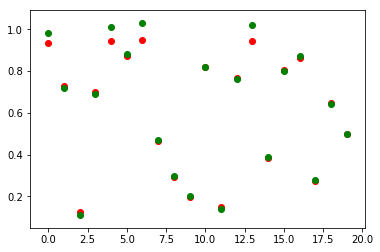

In [51]:
plt.scatter(range(20),results,c='r')
plt.scatter(range(20),ytest,c='g')
plt.show()

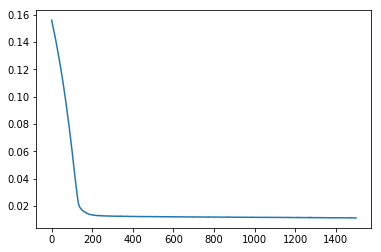

In [52]:
plt.plot(history.history['loss'])
plt.show()